In [1]:
import cv2
import matplotlib.pyplot as plt

# Feature-based image matching
def feature_based_matching(image1, image2):
    # Initiate SIFT detector
    sift = cv2.SIFT_create()

    # Find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(image1, None)
    kp2, des2 = sift.detectAndCompute(image2, None)

    # Create FLANN parameters for feature matching
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)

    # Use FLANN based matcher
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    # Match descriptors
    matches = flann.knnMatch(des1, des2, k=2)

    # Store all the good matches as per Lowe's ratio test.
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)

    return kp1, kp2, good_matches

grid_image = cv2.imread('Images/Screenshot 2024-03-01 044637.png', cv2.IMREAD_GRAYSCALE)
data_image = cv2.imread('Images/image1x2.png', cv2.IMREAD_GRAYSCALE)

# Perform feature-based matching
kp_grid, kp_data, good_matches = feature_based_matching(grid_image, data_image)

# Draw only good matches
matched_image = cv2.drawMatches(grid_image, kp_grid, data_image, kp_data, good_matches, None, flags=2)

# Convert BGR to RGB for matplotlib display
matched_image = cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB)

# Display the good matches
plt.figure(figsize=(15, 7))
plt.imshow(matched_image)
plt.title('Good Matches')
plt.axis('off')
plt.show()


: 

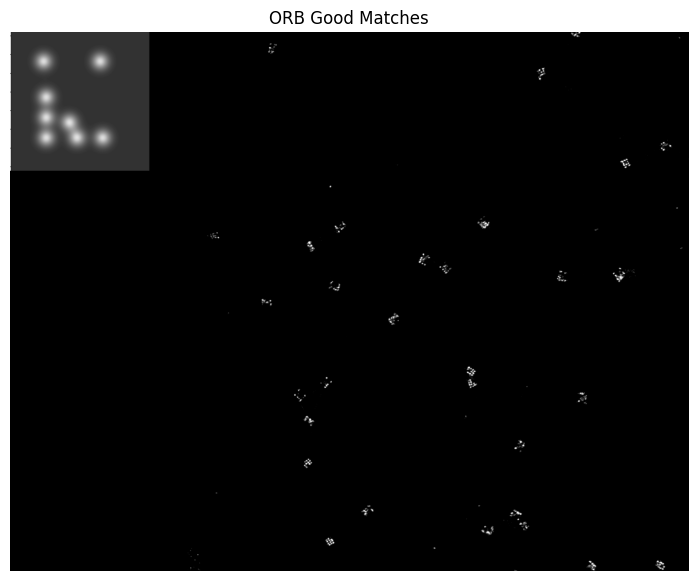

Number of good matches: 0


In [2]:
import cv2
import matplotlib.pyplot as plt


# Function to perform feature-based image matching using ORB
def orb_feature_matching(image1, image2):
    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Find the keypoints and descriptors with ORB
    kp1, des1 = orb.detectAndCompute(image1, None)
    kp2, des2 = orb.detectAndCompute(image2, None)

    # Create BFMatcher object with Hamming distance as measurement
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors
    matches = bf.match(des1, des2)

    # Sort them in the order of their distance (the lower the better)
    good_matches = sorted(matches, key=lambda x: x.distance)

    return kp1, kp2, good_matches

grid_image = cv2.imread('Images/Screenshot 2024-03-01 044637.png', cv2.IMREAD_GRAYSCALE)
data_image = cv2.imread('Images/image1x2.png', cv2.IMREAD_GRAYSCALE)

# Attempt to perform ORB feature matching
try:
    kp_grid, kp_data, good_matches = orb_feature_matching(grid_image, data_image)

    # Draw only good matches
    matched_image = cv2.drawMatches(grid_image, kp_grid, data_image, kp_data, good_matches[:10], None, flags=2)

    # Convert BGR to RGB for matplotlib display
    matched_image = cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB)

    # Display the good matches
    plt.figure(figsize=(15, 7))
    plt.imshow(matched_image)
    plt.title('ORB Good Matches')
    plt.axis('off')
    plt.show()

    # Print the number of good matches
    print(f"Number of good matches: {len(good_matches)}")

    #circling all the good matches 
    for match in good_matches:
        cv2.circle(matched_image, (int(kp_grid[match.queryIdx].pt[0]), int(kp_grid[match.queryIdx].pt[1])), 10, (0, 255, 0), 2)
        cv2.circle(matched_image, (int(kp_data[match.trainIdx].pt[0]), int(kp_data[match.trainIdx].pt[1])), 10, (0, 255, 0), 2)
        
except Exception as e:
    print(f"An error occurred: {e}")
